In [1]:
import json
import os, glob

from itertools import product

import numpy as np
import pandas as pd

import torch

import matplotlib.pyplot as plt
import torchaudio

from torchaudio.functional.filtering import lowpass_biquad, highpass_biquad
from torchaudio.transforms import Spectrogram, MelSpectrogram

from matplotlib import rcParams

from collections import defaultdict

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from synth.synth_architecture import SynthModular
from config import SynthConfig

import seaborn as sns
sns.set_style('whitegrid')

In [53]:
synth_cfg = SynthConfig()
synth = SynthModular(synth_cfg, sample_rate=16000, preset='LFO')

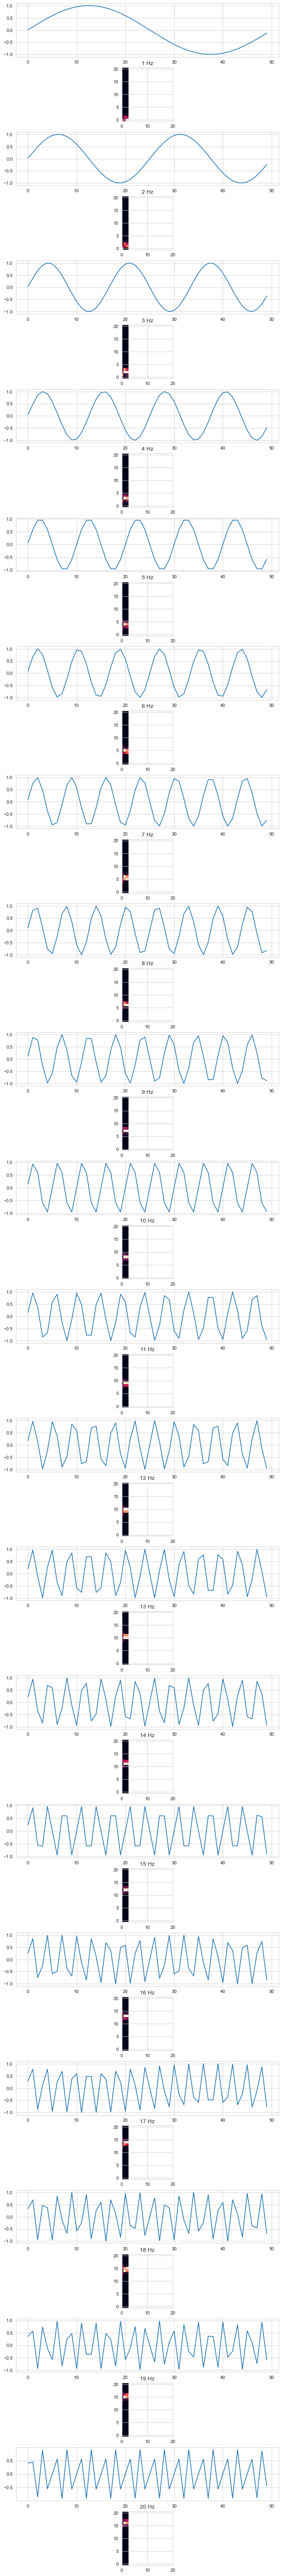

In [56]:
from torchaudio.transforms import Resample
from synth.synth_architecture import SynthModularCell


fig, axes = plt.subplots(40, 1, figsize=(10, 100))
# op = mel_spectrogram_low_frequencies = MelSpectrogram(sample_rate=16000, n_fft=4000, win_length=2000, pad_mode="reflect", power=2.0, norm="slaney",
#                                                                onesided=True, n_mels=64, mel_scale="htk", f_min=0, f_max=30,)

resample_op = Resample(orig_freq=16000, new_freq=50)
spec_op = Spectrogram(n_fft=40, normalized=True)

for i in range(1, 21):

    plt_n = (i-1)*2

    synth_modular_cell = SynthModularCell(index=(0, 0), parameters={'freq': i})
    synth.update_cells([synth_modular_cell])

    signal, _ = synth.generate_signal()
    signal = signal.cpu().detach()

    resampled_signal = resample_op(signal)
    spec = spec_op(resampled_signal)

    np_signal = resampled_signal.numpy().squeeze()
    np_spec = spec.numpy().squeeze()

    axes.flatten()[plt_n].plot(np_signal)

    axes.flatten()[plt_n + 1].imshow(np_spec, origin='lower')
    axes.flatten()[plt_n + 1].set_title(f'{i} Hz')
    axes.flatten()[plt_n + 1].set_xlim([0, 20])

plt.show()

C:\ProgramData\Anaconda3\envs\ai_synth\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


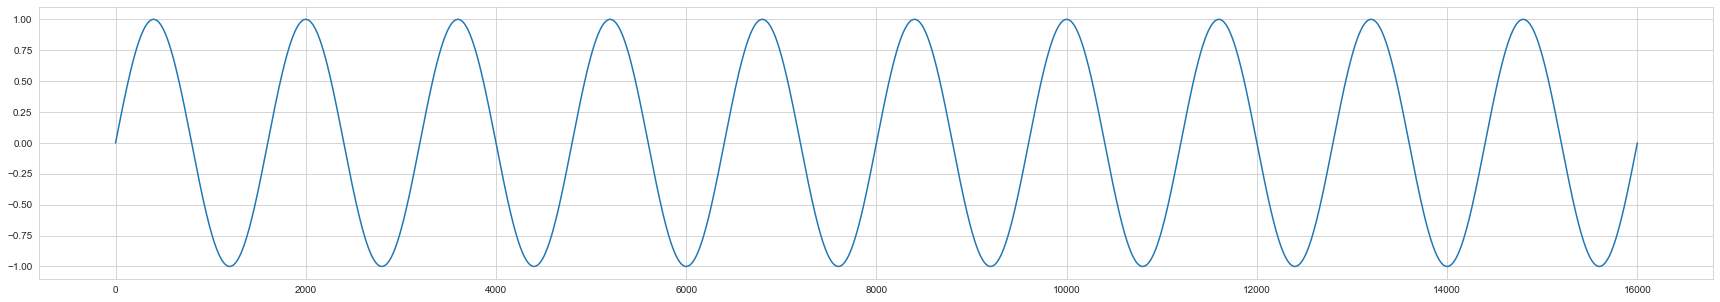

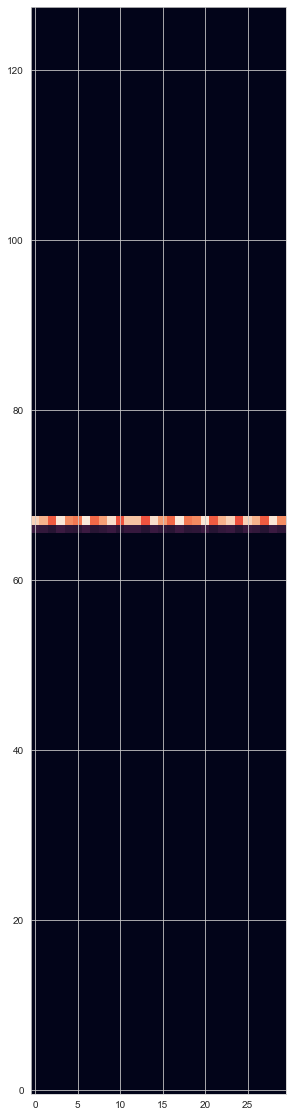